# Implementaion of small Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Data set

In [3]:
X = np.array([[185.32,  12.69],
 [259.92,  11.87],
 [231.01 , 14.41],
 [175.37  ,11.72],
 [187.12  ,14.13],
 [225.91  ,12.1 ],
 [208.41  ,14.18],
 [207.08  ,14.03],
 [280.6   ,14.23],
 [202.87  ,12.25],
 [196.7   ,13.54],
 [270.31  ,14.6 ]])
Y = np.array([[1.],
 [0.],
 [0.],
 [0.],
 [1.],
 [1.],
 [0.],
 [0.],
 [0.],
 [1.],
 [1.],
 [0.]])
print(X.shape, Y.shape)

(12, 2) (12, 1)


## plot data set

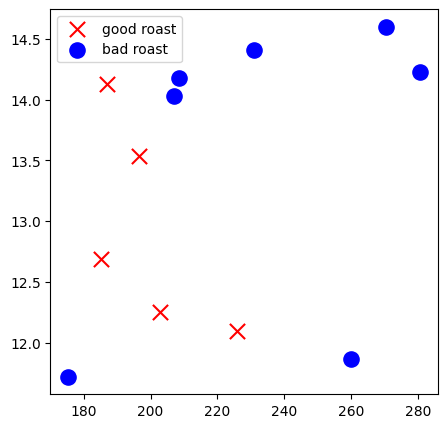

In [18]:
pos = (Y == 1)
neg = (Y == 0)

X1 = X[pos[:,0]]
X2 = X[neg[:,0]]
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(X1[:,0],X1[:,1] ,marker = 'x', c='r', s=120, label='good roast')
ax.scatter(X2[:,0],X2[:,1] ,marker = 'o', c='b', s=120, label='bad roast')
plt.legend()
plt.show()

In [5]:
def normalize(X):
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/ sigma
    
    return X_norm

### Now we should normalize our data set

In [6]:
X_norm = normalize(X)

### we need sigmoid function as activation function

In [7]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

## Numpy Model (Forward Prop in NumPy)
#### Next, we will define the `my_dense()` function which computes the activations of a dense layer.

In [8]:

def my_dense(a_in, W, b, g):
    
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(a_in, w) + b[j]
        a_out[j] = g(z)
    return(a_out)

In [9]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    return(a2)

### Set weights

In [10]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

### Now letl's make predictions!

In [11]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)[0]
    return(p)

In [12]:
predictions = my_predict(X_norm, W1_tmp, b1_tmp, W2_tmp, b2_tmp)


In [13]:
yhat = (predictions >= 0.5).astype(int)

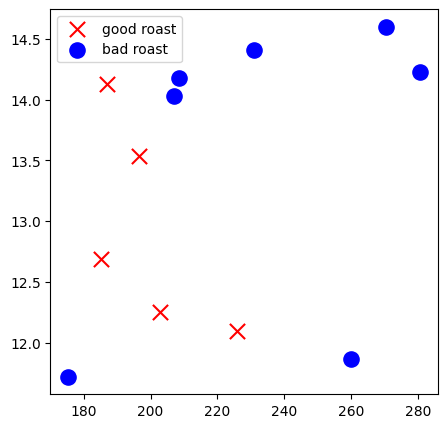

In [14]:
pos = (yhat == 1)
neg = (yhat == 0)
X1 = X[pos[:,0]]
X2 = X[neg[:,0]]
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(X1[:,0],X1[:,1] ,marker = 'x', c='r', s=120, label='good roast')
ax.scatter(X2[:,0],X2[:,1] ,marker = 'o', c='b', s=120, label='bad roast')
plt.legend()
plt.show()